In [64]:
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

#Opening the linearly seperable data file
file = open('Ls.txt', 'r')

#Two arrays for two features
X1 = np.array([])
X2 = np.array([])
for line in file:
    vals = re.findall('[\S]+', line)
    nums = [float(v) for v in vals]
    X1 = np.append(X1, nums[0])
    X2 = np.append(X2, nums[1])

#splitting the data into 3 classes    
X1_class1 = X1[:500]
X2_class1 = X1[:500]
X1_class2 = X1[500:1000]
X2_class2 = X2[500:1000]
X1_class3 = X1[1000:]
X2_class3 = X2[1000:]

#splitting the data of 3 classes into train and test data
# Xij_train means Xi feature of jth class for a sample in training data
X11_train, X11_test, X21_train, X21_test = train_test_split(X1_class1, X2_class1, test_size = 0.3, random_state = 1)
X12_train, X12_test, X22_train, X22_test = train_test_split(X1_class2, X2_class2, test_size = 0.3, random_state = 1)
X13_train, X13_test, X23_train, X23_test = train_test_split(X1_class3, X2_class3, test_size = 0.3, random_state = 1)


**Case 1:** Same Convariance matrix for all classes

Training and test data obtained from full set of data.

In [2]:
X1_train, X1_test, X2_train, X2_test = train_test_split(X1, X2, test_size = 0.3, random_state = 1) 

In [3]:
# Finding out three mean vectors for data from each of the three classes
mean1 = [np.mean(X11_train), np.mean(X21_train)]
mean2 = [np.mean(X12_train), np.mean(X22_train)]
mean3 = [np.mean(X13_train), np.mean(X23_train)]

In [4]:
#checking the values of means obtained
print(mean1)
print(mean2)
print(mean3)

[0.081794828571428585, 0.081794828571428585]
[9.6435302857142862, 9.3792145714285713]
[11.152590857142856, -7.983923142857142]


In [5]:
#cov matrix for case 1
cov = np.cov(np.array(list(zip(X1_train, X2_train))).T)

In [6]:
#checking value of cov matrix obtained
print(cov)

[[ 28.08653648  -2.67460878]
 [ -2.67460878  52.73731709]]


In [36]:
#finding cov matrix for all three classes
cov1 = np.cov(np.array(list(zip(X11_train, X21_train))).T)
cov2 = np.cov(np.array(list(zip(X12_train, X22_train))).T)
cov3 = np.cov(np.array(list(zip(X13_train, X23_train))).T)

In [8]:
#checking the value of cov matrices obtained
print(cov1)
print(cov2)
print(cov3)

[[ 3.94017237  3.94017237]
 [ 3.94017237  3.94017237]]
[[ 4.08459469 -2.80244651]
 [-2.80244651  3.62351897]]
[[ 4.43757656  0.18823133]
 [ 0.18823133  1.05164408]]


In [9]:
Mean = mean2
Cov = cov2
#Function to find out probability given mean and cov
def getVal(x1, x2):
    global Mean,Cov
    X = np.array([x1, x2])
    det_cov = np.linalg.det(Cov)
    v1 = np.matmul((X - Mean).T, Cov)
    v2 = np.matmul(v1, X - Mean)
    power = v2 / -2
    value = np.exp(power)/ math.sqrt(det_cov * 2 * math.pi)
    return value

#Vectorizing the function
gaussian = np.vectorize(getVal)

In [10]:
#evaluating probablities for class 1 training data
Z2 = gaussian(X12_train, X22_train)

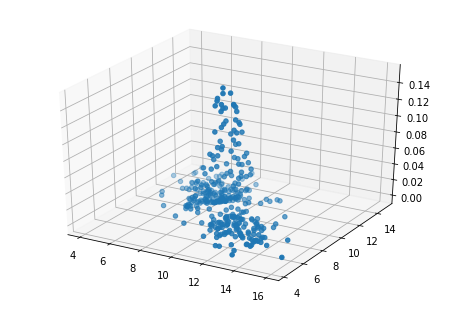

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X12_train, X22_train, Z2)

In [12]:
X, Y = np.meshgrid(X12_train, X22_train)
Z = gaussian(X, Y)

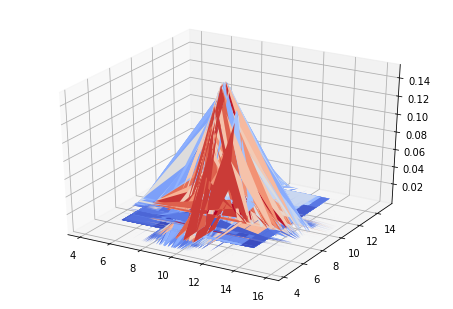

In [13]:
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)

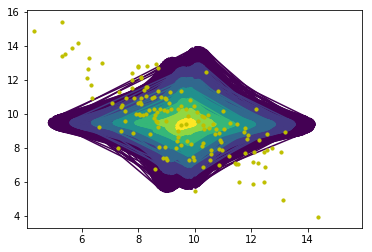

In [14]:
plt.contour(X, Y, Z, zorder = 0)
plt.scatter(X12_test, X22_test, zorder = 1, s = 10, color = 'y')

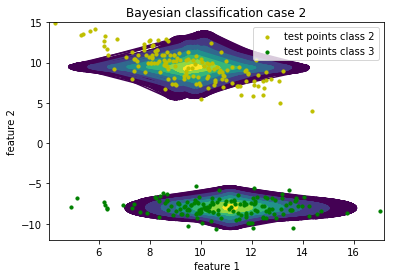

In [22]:
#plotting for case2
Mean = mean2
Cov = cov2
X, Y = np.meshgrid(X12_train, X22_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 0)
plt.scatter(X12_test, X22_test, zorder = 1, s = 10, color = 'y', label = 'test points class 2')
Mean = mean3
Cov = cov3
X, Y = np.meshgrid(X13_train, X23_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 2)
plt.scatter(X13_test, X23_test, zorder = 3, s = 10, color = 'g', label = 'test points class 3')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.ylim(-12,15)
plt.title('Bayesian classification case 2')
plt.legend()

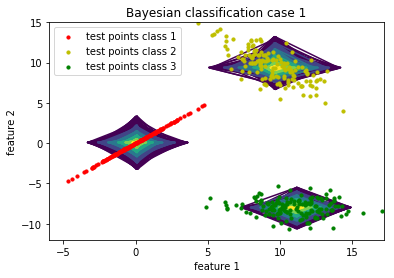

In [23]:
#Plotting for case 1
Mean = mean1
Cov = cov
X, Y = np.meshgrid(X11_train, X21_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 0)
plt.scatter(X11_test, X21_test, zorder = 1, s = 10, color = 'r', label = 'test points class 1')
Mean = mean2
Cov = cov
X, Y = np.meshgrid(X12_train, X22_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 0)
plt.scatter(X12_test, X22_test, zorder = 1, s = 10, color = 'y', label = 'test points class 2')
Mean = mean3
Cov = cov
X, Y = np.meshgrid(X13_train, X23_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 2)
plt.scatter(X13_test, X23_test, zorder = 3, s = 10, color = 'g', label = 'test points class 3')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.ylim(-12,15)
plt.title('Bayesian classification case 1')
plt.legend()

In [30]:
cov1[0][1] = 0
cov1[1][0] = 0

In [31]:
cov1

array([[ 3.94017237,  0.        ],
       [ 0.        ,  3.94017237]])

In [32]:
cov2[0][1] = 0
cov2[1][0] = 0
cov3[0][1] = 0
cov3[1][0] = 0

In [33]:
cov2

array([[ 4.08459469,  0.        ],
       [ 0.        ,  3.62351897]])

In [34]:
cov3

array([[ 4.43757656,  0.        ],
       [ 0.        ,  1.05164408]])

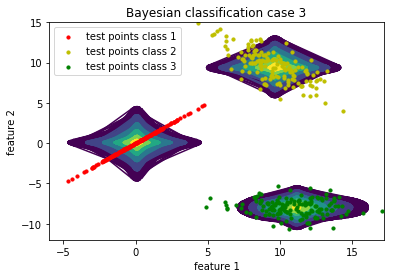

In [35]:
#Plotting for case 3
Mean = mean1
Cov = cov1
X, Y = np.meshgrid(X11_train, X21_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 0)
plt.scatter(X11_test, X21_test, zorder = 1, s = 10, color = 'r', label = 'test points class 1')
Mean = mean2
Cov = cov2
X, Y = np.meshgrid(X12_train, X22_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 0)
plt.scatter(X12_test, X22_test, zorder = 1, s = 10, color = 'y', label = 'test points class 2')
Mean = mean3
Cov = cov3
X, Y = np.meshgrid(X13_train, X23_train)
Z = gaussian(X, Y)
plt.contour(X, Y, Z, zorder = 2)
plt.scatter(X13_test, X23_test, zorder = 3, s = 10, color = 'g', label = 'test points class 3')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.ylim(-12,15)
plt.title('Bayesian classification case 3')
plt.legend()

(-12, 15)

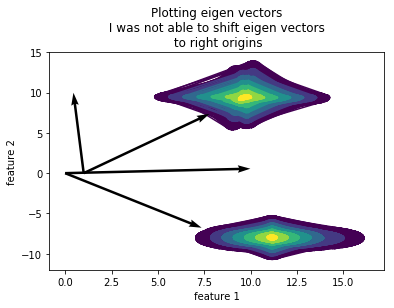

In [43]:
#Plotting eigen vectors
Mean = mean2
Cov = cov2
X, Y = np.meshgrid(X12_train, X22_train)
Z = gaussian(X, Y)
eigenvalues, eigenvectors = np.linalg.eig(cov2)
plt.contour(X, Y, Z, zorder = 0)
plt.quiver(eigenvectors[0], eigenvectors[1], angles = 'xy', scale_units = 'xy', scale = 0.1, zorder = 1)
Mean = mean3
Cov = cov3
X, Y = np.meshgrid(X13_train, X23_train)
Z = gaussian(X, Y)
eigenvalues, eigenvectors = np.linalg.eig(cov3)
plt.contour(X, Y, Z, zorder = 0)
plt.quiver(eigenvectors[0], eigenvectors[1], angles = 'xy', scale_units = 'xy', scale = 0.1, zorder = 1)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plotting eigen vectors\n I was not able to shift eigen vectors \n to right origins')
plt.ylim(-12,15)

In [44]:
cov1

array([[ 3.94017237,  3.94017237],
       [ 3.94017237,  3.94017237]])

In [45]:
cov

array([[ 28.08653648,  -2.67460878],
       [ -2.67460878,  52.73731709]])

In [46]:
Cov = cov

In [47]:
mean = mean1

In [55]:
Cov = cov
Z1 = gaussian(X11_train, X21_train)
Cov = cov2
mean = mean2
Z2 = gaussian(X12_train, X22_train)
mean = mean3
Cov = cov3
Z3 = gaussian(X13_train, X23_train)

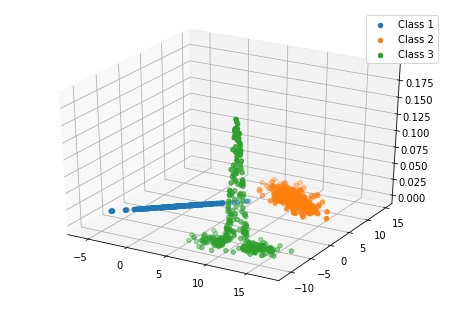

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X11_train, X21_train, Z1, label = 'Class 1')
ax.scatter(X12_train, X22_train, Z2, label = 'Class 2')
ax.scatter(X13_train, X23_train, Z3, label = 'Class 3')
ax.legend()

In [2]:
#Opening the linearly seperable data file
file = open('NLS_Class_1.txt', 'r')

#Two arrays for two features
X11 = np.array([])
X21 = np.array([])
for line in file:
    vals = re.findall('[\S]+', line)
    nums = [float(v) for v in vals]
    X11 = np.append(X11, nums[0])
    X21 = np.append(X21, nums[1])

In [23]:
len(X11)

1000

In [24]:
len(X21)

1000

In [25]:
X11

array([ 27.001 ,  27.185 ,  20.289 ,  28.    ,  31.597 ,  32.609 ,
        19.799 ,  33.726 ,  29.799 ,  21.024 ,  36.943 ,  19.926 ,
        34.163 ,  18.232 ,  15.008 ,  40.317 ,  29.592 ,  27.114 ,
        21.334 ,  17.717 ,  21.15  ,  22.285 ,  18.074 ,  37.682 ,
        20.658 ,  15.705 ,  32.339 ,  32.554 ,  16.576 ,  30.858 ,
        30.615 ,  30.248 ,  20.411 ,  32.447 ,  18.564 ,  18.333 ,
        21.331 ,  16.46  ,  19.691 ,  26.427 ,  14.981 ,  18.144 ,
        23.394 ,  21.892 ,  30.846 ,  43.058 ,  13.789 ,  31.865 ,
        32.662 ,  21.689 ,  33.873 ,  16.421 ,  20.499 ,  23.76  ,
        29.873 ,  26.741 ,  29.95  ,  19.44  ,  35.194 ,  21.001 ,
        32.382 ,  17.862 ,  27.977 ,  30.176 ,  23.468 ,  13.235 ,
        21.761 ,  27.175 ,  21.871 ,  18.155 ,  23.403 ,  26.168 ,
        31.442 ,  21.686 ,  34.795 ,  29.384 ,  23.479 ,  29.001 ,
        19.23  ,  34.727 ,  19.174 ,  27.358 ,  29.71  ,  22.248 ,
        32.081 ,  19.62  ,  29.912 ,  34.413 ,  19.857 ,  17.2

In [26]:
X21

array([ 26.006,  26.817,  22.763,  22.207,  20.959,  24.237,  27.176,
        21.167,  26.351,  25.239,  31.403,  25.638,  22.624,  29.975,
        30.243,  21.07 ,  26.903,  25.89 ,  23.15 ,  30.822,  26.203,
        25.096,  24.418,  29.704,  21.564,  21.09 ,  31.138,  28.481,
        28.17 ,  29.004,  26.451,  22.094,  23.927,  25.209,  23.092,
        25.992,  24.496,  32.164,  24.658,  24.421,  23.422,  20.621,
        26.553,  22.614,  25.274,  24.609,  21.207,  23.855,  26.22 ,
        24.437,  22.732,  26.797,  23.9  ,  24.235,  22.692,  26.454,
        24.669,  27.439,  22.328,  27.132,  24.14 ,  25.085,  26.536,
        26.679,  26.181,  28.731,  21.859,  27.16 ,  24.759,  26.581,
        26.474,  25.626,  19.894,  27.306,  27.709,  22.373,  23.817,
        24.135,  26.959,  31.528,  27.891,  25.496,  20.393,  25.652,
        25.619,  27.393,  22.909,  26.265,  23.483,  28.252,  25.574,
        24.352,  25.264,  22.239,  21.806,  24.118,  23.337,  27.935,
        19.83 ,  21.

In [27]:
sum_x1 = 0
for x in X11:
    sum_x1 += x
mean_x1 = sum_x1/ len(X11)
sum_x2 = 0
for x in X21:
    sum_x2 += x
mean_x2 = sum_x2/ len(X21)

mean1 = [mean_x1, mean_x2]

In [28]:
mean1

[25.328986199999967, 25.259522000000025]

In [33]:
X = [X11, X21]
mean1 = np.mean([X11, X21], axis = 1)
mean1

array([ 25.3289862,  25.259522 ])

In [34]:
sum_x1 = 0
sum_x2 = 0
for x in X11:
    sum_x1 += (x - mean_x1) ** 2
var_x1 = sum_x1 / len(X11)
for x in X21:
    sum_x2 += (x - mean_x2) ** 2
var_x2 = sum_x2 / len(X21)    

In [35]:
var_x1

46.296061337909499

In [36]:
var_x2

7.2037859995159979

In [37]:
cov1 = np.cov(X)

In [20]:
#cov1 and mean1 denote the covariance and mean for class 1 data

In [3]:
#Opening the linearly seperable data file
file = open('NLS_Class_2.txt', 'r')

#Two arrays for two features
X12 = np.array([])
X22 = np.array([])
for line in file:
    vals = re.findall('[\S]+', line)
    nums = [float(v) for v in vals]
    X12 = np.append(X12, nums[0])
    X22 = np.append(X22, nums[1])

In [4]:
from sklearn.model_selection import train_test_split
X11_train, X11_test, X21_train, X21_test = train_test_split(X11, X21, test_size = 0.3, random_state = 1)
X12_train, X12_test, X22_train, X22_test = train_test_split(X12, X22, test_size = 0.3, random_state = 1)

In [40]:
X11.shape

(1000,)

In [41]:
X11_train.shape

(700,)

In [5]:
mean1 = np.mean([X11_train, X21_train], axis = 1)
mean2 = np.mean([X12_train, X22_train], axis = 1)

In [43]:
mean1

array([ 25.16453757,  25.25361429])

In [44]:
mean2

array([ 25.11565143,  25.26006386])

In [49]:
sum_x1 = 0
for x in X12:
    sum_x1 += x
mean_x1 = sum_x1/ len(X11)
sum_x2 = 0
for x in X22:
    sum_x2 += x
mean_x2 = sum_x2/ len(X21)

mean1 = [mean_x1, mean_x2]

In [51]:
mean1

[25.217157999999952, 25.328560700000001]

In [45]:
cov1 = np.cov([X11_train, X21_train])
cov2 = np.cov([X12_train, X22_train])

In [53]:
cov1

array([[ 44.97344267,  -2.62649879],
       [ -2.62649879,   6.87442668]])

In [54]:
cov2

array([[  7.38024715,  -1.7531543 ],
       [ -1.7531543 ,  46.72946099]])

In [5]:
X11.shape

(1000,)

In [6]:
X11_train.shape

(700,)

In [7]:
X12_train.shape

(700,)

In [7]:
def getVal(x1, x2):
    global Mean,Cov
    X = np.array([x1, x2])
    det_cov = np.linalg.det(Cov)
    v1 = np.matmul((X - Mean).T, Cov)
    v2 = np.matmul(v1, X - Mean)
    power = v2 / -2
    value = np.exp(power)/ math.sqrt(det_cov * 2 * math.pi)
    return value

#Vectorizing the function
gaussian = np.vectorize(getVal)

In [9]:
Mean = mean1
Cov = cov1

In [8]:
x_min = min(X11_train.min(), X12_train.min())
x_max = max(X11_train.max(), X12_train.max())

In [10]:
y_min = min(X21_train.min(), X22_train.min())
y_max = max(X21_train.max(), X22_train.max())

In [14]:
x_min

6.4633000000000003

In [15]:
x_max

47.405999999999999

In [11]:
x_min -= 1
y_min -= 1
x_max += 1
y_max += 1

In [12]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

In [13]:
xx.shape

(367, 430)

In [14]:
yy.shape

(367, 430)

In [16]:
np.c_[xx.ravel(), yy.ravel()]

array([[  5.4633,   4.6061],
       [  5.5633,   4.6061],
       [  5.6633,   4.6061],
       ..., 
       [ 48.1633,  41.2061],
       [ 48.2633,  41.2061],
       [ 48.3633,  41.2061]])

In [46]:
def getZ(x1, x2):
    global Mean, Cov
    Mean = mean1
    Cov = cov1
    p1 = getVal(x1, x2)
    Mean = mean2
    Cov = cov2
    p2 = getVal(x1, x2)
    if(p1 >= p2):
        return 1
    else:
        return 2

In [47]:
getZ_vectorized = np.vectorize(getZ)

In [48]:
Z = getZ_vectorized(xx.ravel(), yy.ravel())

In [49]:
Z = Z.reshape(xx.shape)

In [50]:
Z.shape

(367, 430)

Text(0.5,1,'Case 2: Non lineraly seperable data\n Different covariances matrices')

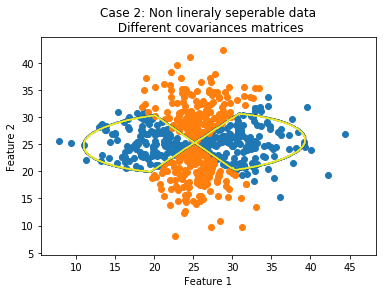

In [51]:
plt.contour(xx, yy, Z)
plt.scatter(X11_test, X21_test)
plt.scatter(X12_test, X22_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Case 2: Non lineraly seperable data\n Different covariances matrices')

In [52]:
X1 = np.append(X11_train, X12_train)
X2 = np.append(X21_train, X22_train)

In [53]:
X1.shape

(1400,)

In [54]:
cov = np.cov([X1,X2])

In [55]:
cov

array([[ 26.15873169,  -2.18834015],
       [ -2.18834015,  26.78279631]])

In [56]:
def getZ(x1, x2):
    global Mean, Cov
    Mean = mean1
    Cov = cov
    p1 = getVal(x1, x2)
    Mean = mean2
    Cov = cov
    p2 = getVal(x1, x2)
    if(p1 >= p2):
        return 1
    else:
        return 2

In [57]:
getZ_vectorized = np.vectorize(getZ)
Z = getZ_vectorized(xx.ravel(), yy.ravel())
Z = Z.reshape(xx.shape)

Text(0.5,1,'Case 1: Non lineraly seperable data\n Same covariances matrices')

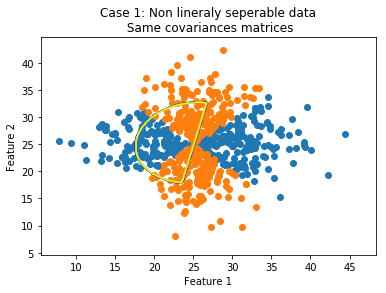

In [58]:
plt.contour(xx, yy, Z)
plt.scatter(X11_test, X21_test)
plt.scatter(X12_test, X22_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Case 1: Non lineraly seperable data\n Same covariances matrices')

In [59]:
cov1[0][1] = 0
cov1[1][0] = 0
cov1

array([[ 44.97344267,   0.        ],
       [  0.        ,   6.87442668]])

In [60]:
cov2[0][1] = 0
cov2[1][0] = 0
cov2

array([[  7.38024715,   0.        ],
       [  0.        ,  46.72946099]])

In [61]:
def getZ(x1, x2):
    global Mean, Cov
    Mean = mean1
    Cov = cov1
    p1 = getVal(x1, x2)
    Mean = mean2
    Cov = cov1
    p2 = getVal(x1, x2)
    if(p1 >= p2):
        return 1
    else:
        return 2

In [62]:
getZ_vectorized = np.vectorize(getZ)
Z = getZ_vectorized(xx.ravel(), yy.ravel())
Z = Z.reshape(xx.shape)

Text(0.5,1,'Case 3: Non lineraly seperable data\n Diagonal covariances matrices')

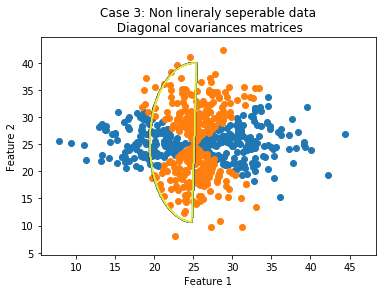

In [63]:
plt.contour(xx, yy, Z)
plt.scatter(X11_test, X21_test)
plt.scatter(X12_test, X22_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Case 3: Non lineraly seperable data\n Diagonal covariances matrices')

In [66]:
X11_train.shape

(350,)

In [67]:
target = np.ones_like(X11_train)

In [70]:
target = np.append(target, np.ones_like(X12_train) * 2)

In [71]:
target.shape

(700,)

In [73]:
target = np.append(target, np.ones_like(X13_train) * 3)

In [74]:
target.shape

(1050,)

In [76]:
X1 = np.append(X11_train, X12_train)

In [78]:
X1.shape

(700,)

In [79]:
X1 = np.append(X1, X13_train)

In [80]:
X1.shape

(1050,)

In [82]:
X2 = np.append(X21_train, X22_train)
X2 = np.append(X2, X23_train)

In [84]:
data = np.c_[X1, X2]

In [85]:
data.shape

(1050, 2)

In [86]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [88]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [89]:
gnb = GaussianNB()

In [90]:
gnb.fit(data, target)

GaussianNB(priors=None)

In [93]:
x_min = min(X11_train.min(), X12_train.min(), X13_train.min()) - 1
y_min = min(X21_train.min(), X22_train.min(), X23_train.min()) - 1

In [95]:
x_max = max(X11_train.max(), X12_train.max(), X13_train.max()) + 1
y_max = max(X21_train.max(), X22_train.max(), X23_train.max()) + 1

In [96]:
x_max

18.187999999999999

In [99]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

In [100]:
xx.shape

(281, 252)

In [101]:
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

In [102]:
Z = Z.reshape(xx.shape)

In [103]:
Z.shape

(281, 252)

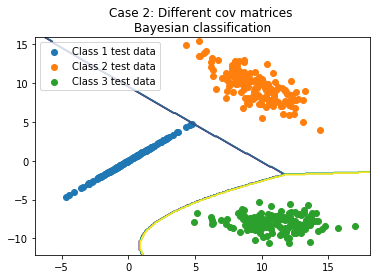

In [107]:
plt.contour(xx, yy, Z)
plt.scatter(X11_test, X21_test, label = 'Class 1 test data')
plt.scatter(X12_test, X22_test, label = 'Class 2 test data')
plt.scatter(X13_test, X23_test, label = 'Class 3 test data')
plt.title('Case 2: Different cov matrices \nBayesian classification')
plt.legend()